In [123]:

# Swati Dogra
# DSC 540
# Week 7 & 8 Excercises


In [125]:
# Load necessary libraries
import numpy as np
import pandas as pd

In [127]:
# Excercise 7.1 -  Extracting the top 100 ebooks from gutenberg

In [129]:
# import necessary libraries 

import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [131]:
# read html file from the gutenberg url

top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

In [132]:
# function to check status of web request

def status_check(r):
    if r.status_code == 200:
        print ("Success!")
        return 1
    else:
        print ("Failed!")
        return -1

In [133]:
# status of response

status_check(response)

Success!


1

In [135]:
# Decode the response and pass it on to Beautifulsoup for html parsing

contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

In [139]:
# find all href tags and store them in the list of links

#Empty list to hold all the http links in the HTML page

lst_links=[]

for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

In [141]:
# print first 30 elements

lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [143]:
# using regex to find numbers

booknum = []

for i in range(19,119):
    link=lst_links[i]
    link=link.strip()

    n = re.findall('[0-9]+',link)
    if len(n) == 1:
        booknum.append(int(n[0]))


print("/n The file numbers for the top 100 ebooks",\
    "on Gutenberg are shown below\n"+"-"*70)
print(booknum)

/n The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 33283, 1513, 2701, 1342, 2641, 100, 145, 37106, 16389, 67979, 6761, 394, 2160, 4085, 6593, 1259, 5197, 84, 11, 345, 2554, 74101, 74103, 5200, 174, 64317, 2600, 1661, 50150, 2000, 24022, 4300, 28054, 49010, 55, 2542, 98, 74095, 76, 1998, 844, 6130, 74105, 1080, 161, 30254, 1952, 1400, 1184, 1232, 43, 2591, 45, 74098, 4363, 1727, 74102, 27827, 8492, 219, 5740, 74, 10, 244, 1260, 46, 2650, 996, 768, 67098, 2680, 205, 8581, 31284, 16, 514, 74099, 36034, 1497, 135, 31552, 2814, 8800, 25344, 21593, 600]


In [145]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Ways to donate







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2024-07-23408106
last 7 days2675075
last 30 days10986845



Top 100 EBooks yest

In [147]:
# creating a starting index using splitlines method of soup

lst_titles_temp=[]
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

In [149]:
# run the loop 1 to 100 to add strings of the next 100 lines to temp list

for i in range(100):
    lst_titles_temp.append(soup.text.splitlines() [start_idx+2+i])

In [151]:
# using match and span to find the indices 
lst_titles=[]
for i in range(8,100):
    id1, id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i] [id1:id2])

In [153]:
# print the list of lines
for l in lst_titles:
    print(l)

Calculus Made Easy by Silvanus P
Romeo and Juliet by William Shakespeare 
Moby Dick
Pride and Prejudice by Jane Austen 
A Room with a View by E
The Complete Works of William Shakespeare by William Shakespeare 
Middlemarch by George Eliot 
Little Women
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
History of Tom Jones
Twenty years after by Alexandre Dumas and Auguste Maquet 
My Life 
Frankenstein
Alice
Dracula by Bram Stoker 
Crime and Punishment by Fyodor Dostoyevsky 
The Street of the Eye 
A woman
Metamorphosis by Franz Kafka 
The Picture of Dorian Gray by Oscar Wilde 
The Great Gatsby by F
War and Peace by graf Leo Tolstoy 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The Devil is an Ass by Ben Jonson 
Don Quijote by Miguel de Cervantes Saavedra 
A Christmas Carol by Charles Dickens 
Ulysses by James 

In [156]:
# Excerise 7.2 - Build movie database by reading an api

In [158]:
import urllib.request, urllib.parse, urllib.error
import json

In [160]:
# Load the secret API key from the JSON file
def load_api_key(file_path):
    with open(file_path, 'r') as file:
        data = json.loads(file.read())
        return data['api_key']

In [162]:
#Path to json file

file_path = (r'C:/Users/swati/OneDrive/Desktop/Swati/Bellevue/DSC 540/Week7&8/APIkeys.json')

print(file_path)

C:/Users/swati/OneDrive/Desktop/Swati/Bellevue/DSC 540/Week7&8/APIkeys.json


In [164]:
# Load the API key
api_key = load_api_key(file_path)

In [166]:
# Print the API key to verify (optional)
print(f"Loaded API key: {api_key}")

Loaded API key: 56ff5b9e


In [168]:
# Store the API key in a JSON file
def store_api_key(file_path, api_key):
    with open(file_path, 'w') as file:
        json.dump({'apikey': api_key}, file)

In [170]:
# Assign the OMDB portal URL to a variable
omdb_url = "http://www.omdbapi.com/?"


In [172]:
# Utility function to print the movie data from a JSON file
def print_json(json_data):
    list_keys=['Title','Year','Rated','Released',\
               'Runtime','Genre','Director','Writer',\
               'Actors','Plot','Language','Country',\
               'Awards','Ratings','Metascore','imdbRating',\
               'imdbVotes','imdbID']
#    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
#     print("-"*50)           
#    print(json.dumps(data, indent=4))

In [174]:
# Construct the full URL
apikey = "&apikey=56ff5b9e"

full_url = omdb_url + apikey

print(full_url)



http://www.omdbapi.com/?&apikey=56ff5b9e


In [176]:
# Fetch data from the OMDB API
response = urllib.request.urlopen(full_url)
movie_data = json.loads(response.read())

# Print the movie data
print_json(movie_data)

In [178]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url=json_data['Poster']

    poster_file_extension=poster_url.split('.')[-1]

    poster_data=urllib.request.urlopen(poster_url).read()

    savelocation=os.getcwd()+'\\'+'Posters'+'\\'

    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    filename=savelocation+str(title)\
            +'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [180]:
def search_movie(title):
    try:
        url=omdb_url \
            + urllib.parse.urlencode({'t':str(title)})+apikey
        print(f'Retrieving the data of "{title}" now ...')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        if json_data['Response']=='True':
            print_json(json_data)
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [182]:
# search for movie - titanic

search_movie("Titanic")

Retrieving the data of "Titanic" now ...
http://www.omdbapi.com/?t=Titanic&apikey=56ff5b9e
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,292,276
imdbID: tt0120338


In [183]:
# search for a movie that does not exist for random error generation

search_movie("Ramdom_error")

Retrieving the data of "Ramdom_error" now ...
http://www.omdbapi.com/?t=Ramdom_error&apikey=56ff5b9e
Error encountered:  Movie not found!


In [188]:
# Assigment question 3 - Connect to an API of your choice and do a simple data pull 

In [190]:
import requests

# URL of the Art Institute of Chicago API with a search query for "cats"
url = "https://api.artic.edu/api/v1/artworks/search?q=cats"

# Sending a GET request to the API
response = requests.get(url)

# Parsing the JSON response
data = response.json()

# Extracting a subset of data (e.g., titles and artist names of the first 5 artworks)
artworks = data['data'][:5]
for artwork in artworks:
    title = artwork['title']
    id = artwork['id']
    print(f"Title: {title}, Title ID: {id}")

Title: Lion (One of a Pair, South Pedestal), Title ID: 656
Title: Girl with Cat, Title ID: 117241
Title: Nude with Cats, Title ID: 45259
Title: Cat Making Up, Title ID: 16227
Title: Homesickness, Title ID: 22482


In [192]:
# Assignment question 4 - using a dataset plot various charts

In [195]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df=pd.read_csv("C:/Users/swati/OneDrive/Desktop/Swati/Bellevue/DSC 540/Week7&8/Auto Sales data.csv", low_memory=False)

print("\n First 2 records :\n")
print(df.head(2))

print("\n Total number of records: \n")
print(df.shape)


 First 2 records :

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER   SALES  \
0        10107               30      95.70                2  2871.0   
1        10121               34      81.35                5  2765.9   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   

         CUSTOMERNAME       PHONE             ADDRESSLINE1   CITY POSTALCODE  \
0   Land of Toys Inc.  2125557818  897 Long Airport Avenue    NYC      10022   
1  Reims Collectables  26.47.1555       59 rue de l'Abbaye  Reims      51100   

  COUNTRY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0     USA              Yu             Kwai    Small  
1  France         Henriot             Paul    Small  

 Total number of records: 

(2747, 20)


In [197]:
grouped1_df = df.groupby('PRODUCTLINE').sum().reset_index()

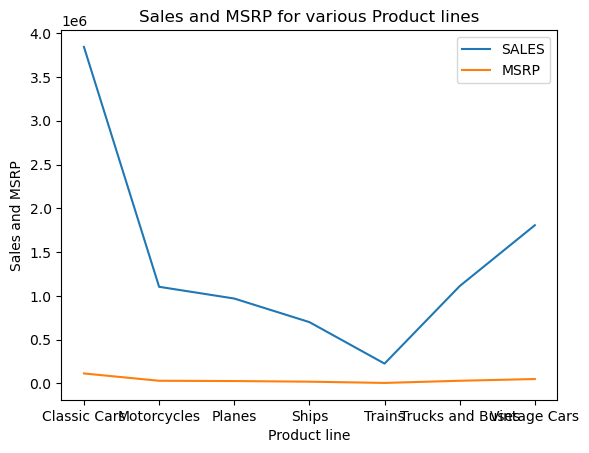

In [199]:
# Line plot

grouped1_df.plot(x='PRODUCTLINE', y=['SALES', 'MSRP'], kind='line')
plt.xlabel('Product line')
plt.ylabel('Sales and MSRP')
plt.title('Sales and MSRP for various Product lines')
plt.show()

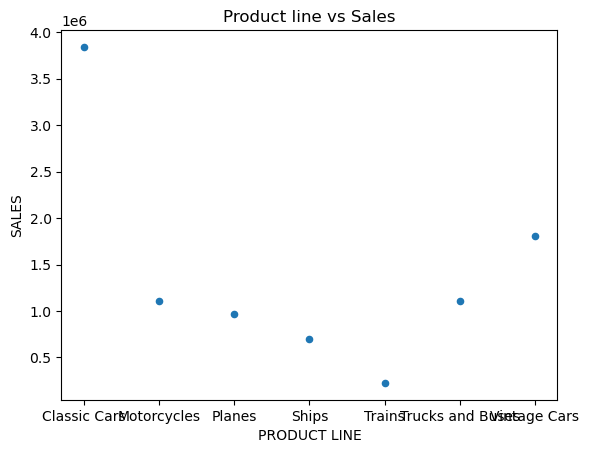

In [200]:
# Scatter plot

grouped1_df.plot(kind='scatter', x='PRODUCTLINE', y='SALES')
plt.xlabel('PRODUCT LINE')
plt.ylabel('SALES')
plt.title('Product line vs Sales')
plt.show()

In [203]:
grouped_df = df.groupby('DEALSIZE').sum().reset_index()

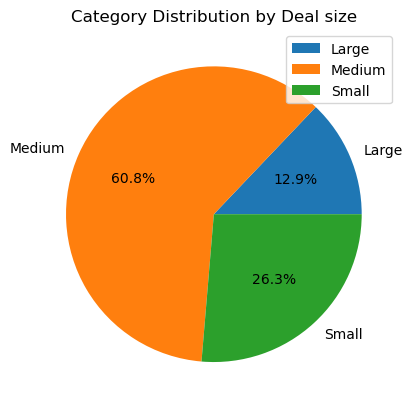

In [205]:
# Pie plot

grouped_df.plot(kind='pie', y='SALES', labels=grouped_df['DEALSIZE'], autopct='%1.1f%%')
plt.title('Category Distribution by Deal size')
plt.ylabel('')  # Hide the y-label
plt.show()